# Emotion Detection Data Preparation

This notebook demonstrates the steps to prepare the GoEmotions dataset for a multi-label classification task.

 We will perform the following steps:
1. Group and sum emotion labels for each unique text.
2. Clean the dataset by removing conflicting neutral labels.
3. Retain only the top 3 emotion labels per text.
4. Stratify the dataset based on the labels.
5. Visualize the data before and after each step.


## Step 1: Load the Data
First, we load the GoEmotions dataset and inspect its structure.


In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datasets import load_dataset

dataFrame = load_dataset('go_emotions', 'raw')

print("Total data size: ", len(dataFrame["train"]))
df = dataFrame["train"].to_pandas()
df.to_parquet("go_emotions.parquet")
df

Total data size:  211225


,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,1.547634e+09,16,False,0,...,1,0,0,0,0,0,0,0,0,0
211221,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,1.548553e+09,15,False,0,...,0,0,0,0,0,0,0,0,0,0
211222,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,1.547684e+09,70,False,1,...,0,0,0,0,0,0,0,0,0,0
211223,The FDA has plenty to criticize. But like here...,edrhoxh,enamedata,medicine,t3_aejqzd,t1_edrgdtx,1.547169e+09,4,False,0,...,0,0,0,0,0,0,0,0,0,0


## Step 2: Group and Sum Emotion Labels
Next, we group the dataset by text and sum the emotion labels for each unique text.

In [40]:
# Columns containing emotion labels
emotions = df.columns[9:]

# Group by text and sum the emotion columns
df_grouped = df.groupby('text', as_index=False)[emotions].sum()

# Display the first few rows of the grouped dataset
print("Grouped Dataset:")
print(df_grouped.head())


Grouped Dataset:
                                                text  admiration  amusement  \
0   "If you don't wear BROWN AND ORANGE...YOU DON...           0          0   
1   "What do Scottish people look like?" How I wo...           0          0   
2     ### A surprise, to be sure, but a welcome one            0          0   
3   '*Pray*, v. To ask that the laws of the unive...           0          0   
4   >it'll get invaded by tankie, unfortunately. ...           0          0   

   anger  annoyance  approval  caring  confusion  curiosity  desire  ...  \
0      1          2         1       0          0          0       0  ...   
1      0          0         0       0          0          3       0  ...   
2      0          0         0       0          0          0       0  ...   
3      0          0         0       0          0          0       0  ...   
4      0          0         0       0          0          0       0  ...   

   love  nervousness  optimism  pride  realization 

## Step 3: Remove Conflicting Neutral Labels
We remove the neutral label if it is set amongst other labels.

In [41]:
# Clean up the dataset by removing the neutral label if it conflicts with other labels
def remove_conflicting_neutral(row):
    if row['neutral'] > 0 and row[emotions].sum() >= row['neutral']:
        row['neutral'] = 0
    return row

df_grouped = df_grouped.apply(remove_conflicting_neutral, axis=1)

# Display the first few rows after removing conflicting neutral labels
print("Dataset after Removing Conflicting Neutral Labels:")
print(df_grouped.head())


Dataset after Removing Conflicting Neutral Labels:
                                                text  admiration  amusement  \
0   "If you don't wear BROWN AND ORANGE...YOU DON...           0          0   
1   "What do Scottish people look like?" How I wo...           0          0   
2     ### A surprise, to be sure, but a welcome one            0          0   
3   '*Pray*, v. To ask that the laws of the unive...           0          0   
4   >it'll get invaded by tankie, unfortunately. ...           0          0   

   anger  annoyance  approval  caring  confusion  curiosity  desire  ...  \
0      1          2         1       0          0          0       0  ...   
1      0          0         0       0          0          3       0  ...   
2      0          0         0       0          0          0       0  ...   
3      0          0         0       0          0          0       0  ...   
4      0          0         0       0          0          0       0  ...   

   love  nervousn

## Step 4: Retain Only Top 3 Labels
For each row, we keep only the top 3 emotion labels with the highest scores and set those to 1, while setting all other labels to 0.


In [42]:
import numpy as np

# Keep only the top 3 labels with the highest scores
def keep_top_3_labels(row):
    # Get the top 3 labels
    top_3_indices = np.argsort(row.values)[-3:]
    # Set all values to 0
    row[:] = 0
    # Set the top 3 labels to 1
    row.iloc[top_3_indices] = 1
    return row

df_grouped[emotions] = df_grouped[emotions].apply(keep_top_3_labels, axis=1)

# Display the first few rows after keeping only the top 3 labels
print("Dataset after Keeping Only Top 3 Labels:")
print(df_grouped.head())


Dataset after Keeping Only Top 3 Labels:
                                                text  admiration  amusement  \
0   "If you don't wear BROWN AND ORANGE...YOU DON...           0          0   
1   "What do Scottish people look like?" How I wo...           0          0   
2     ### A surprise, to be sure, but a welcome one            0          1   
3   '*Pray*, v. To ask that the laws of the unive...           0          1   
4   >it'll get invaded by tankie, unfortunately. ...           0          1   

   anger  annoyance  approval  caring  confusion  curiosity  desire  ...  \
0      1          1         1       0          0          0       0  ...   
1      0          0         0       0          0          1       0  ...   
2      0          0         0       0          0          0       0  ...   
3      0          0         0       0          0          0       0  ...   
4      0          0         0       0          0          0       0  ...   

   love  nervousness  optim

## Step 5: Stratify the Dataset
We stratify the dataset based on the labels to ensure the distribution of labels is maintained.

In [43]:
from sklearn.model_selection import train_test_split

# Create a multi-label indicator for stratification
df_grouped['labels'] = df_grouped[emotions].apply(lambda x: tuple(x), axis=1)

# Count the occurrences of each label combination
label_counts = df_grouped['labels'].value_counts()

# Identify rare combinations (those that appear less than twice)
rare_combinations = label_counts[label_counts < 2].index
print("Rare Combinations:", len(rare_combinations))

# Filter out rows with rare combinations
df_filtered = df_grouped[~df_grouped['labels'].isin(rare_combinations)]

# Stratify the dataset
train, test = train_test_split(df_filtered, test_size=0.2, stratify=df_filtered['labels'])

# Drop the 'labels' column as it was only needed for stratification
train = train.drop(columns=['labels'])
test = test.drop(columns=['labels'])

# Display the resulting datasets
print("Training set size:", len(train))
print("Test set size:", len(test))
print("First few rows of training set:\n", train.head())
print("First few rows of test set:\n", test.head())



Rare Combinations: 488
Training set size: 45795
Test set size: 11449
First few rows of training set:
                                                     text  admiration  \
39301  That was awesome. Momentum is really something...           1   
656                                 *shitty piece of fat           0   
19334  I thought she would run into an axe thrower an...           0   
53342           [NAME] must have like 6 rebounds already           0   
45511  Was this at Meadowvale? I wanted to take a pic...           0   

       amusement  anger  annoyance  approval  caring  confusion  curiosity  \
39301          0      0          0         0       0          1          0   
656            0      0          1         0       0          0          0   
19334          0      0          1         1       0          0          0   
53342          0      0          0         1       0          0          0   
45511          0      0          0         1       0          1          1 

## Visualizations
Let's visualize the distribution of labels before and after each step.

### Original Dataset


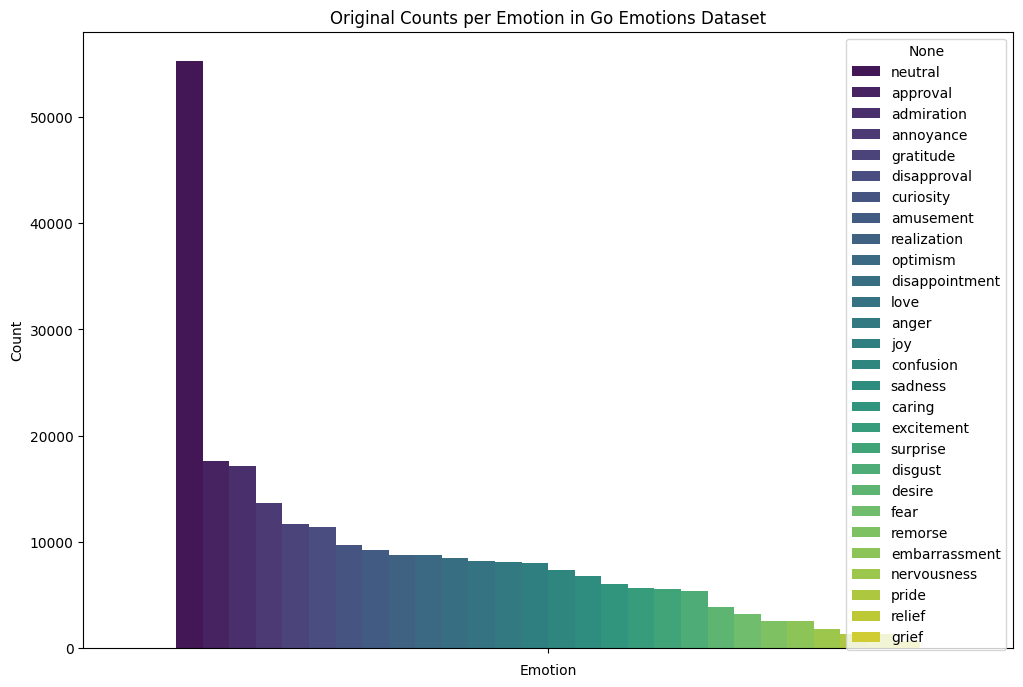

In [47]:
# Plot the original distribution of emotion labels
import matplotlib.pyplot as plt
import seaborn as sns

original_emotion_counts = df[emotions].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(hue=original_emotion_counts.index, y=original_emotion_counts.values, palette="viridis")
plt.title('Original Counts per Emotion in Go Emotions Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Grouped Dataset

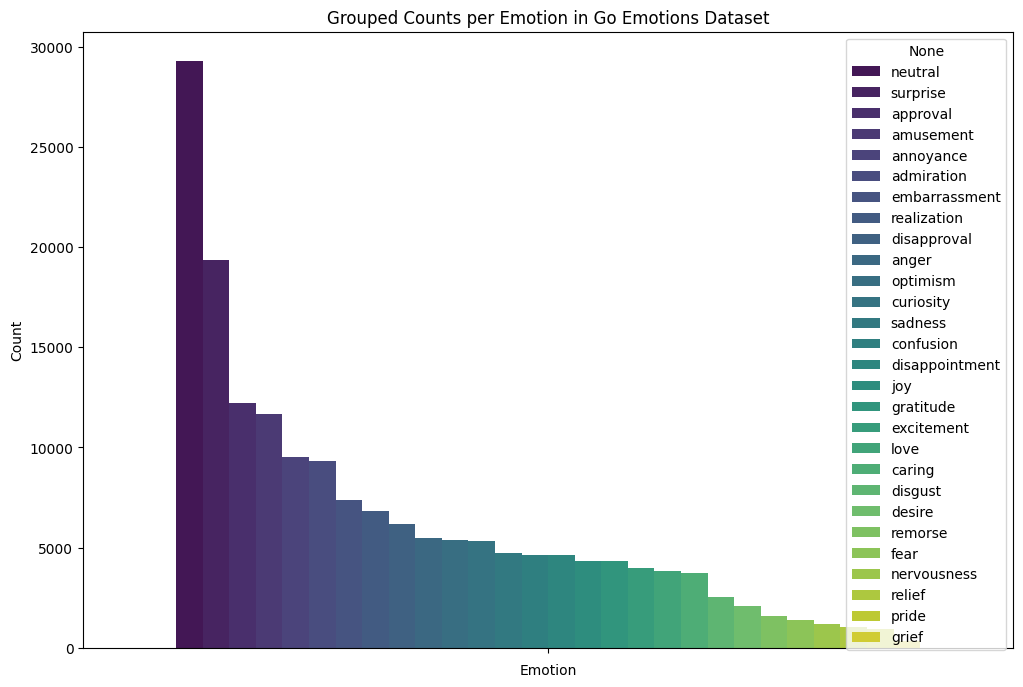

In [48]:
# Plot the distribution of emotion labels after grouping
grouped_emotion_counts = df_grouped[emotions].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(hue=grouped_emotion_counts.index, y=grouped_emotion_counts.values, palette="viridis")
plt.title('Grouped Counts per Emotion in Go Emotions Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Cleaned Dataset

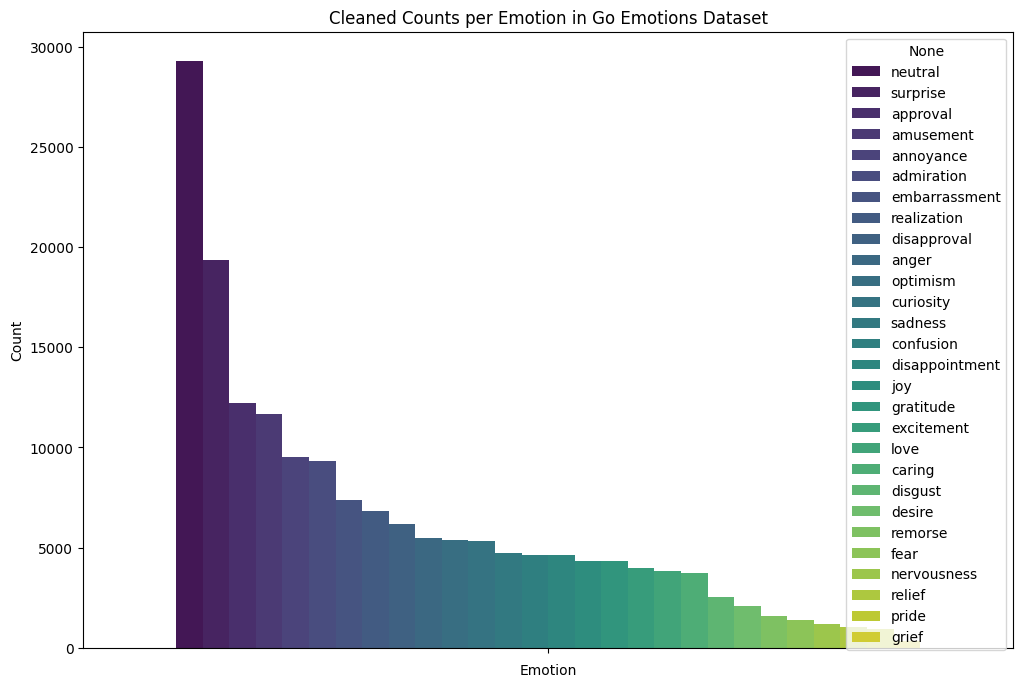

In [53]:
# Plot the distribution of emotion labels after removing conflicting neutral labels
cleaned_emotion_counts = df_grouped[emotions].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(hue=cleaned_emotion_counts.index, y=cleaned_emotion_counts.values, palette="viridis")
plt.title('Cleaned Counts per Emotion in Go Emotions Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Dataset with Top 3 Labels


/tmp/ipykernel_425893/3944620099.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_emotion_counts.index, y=top_3_emotion_counts.values, palette="viridis")


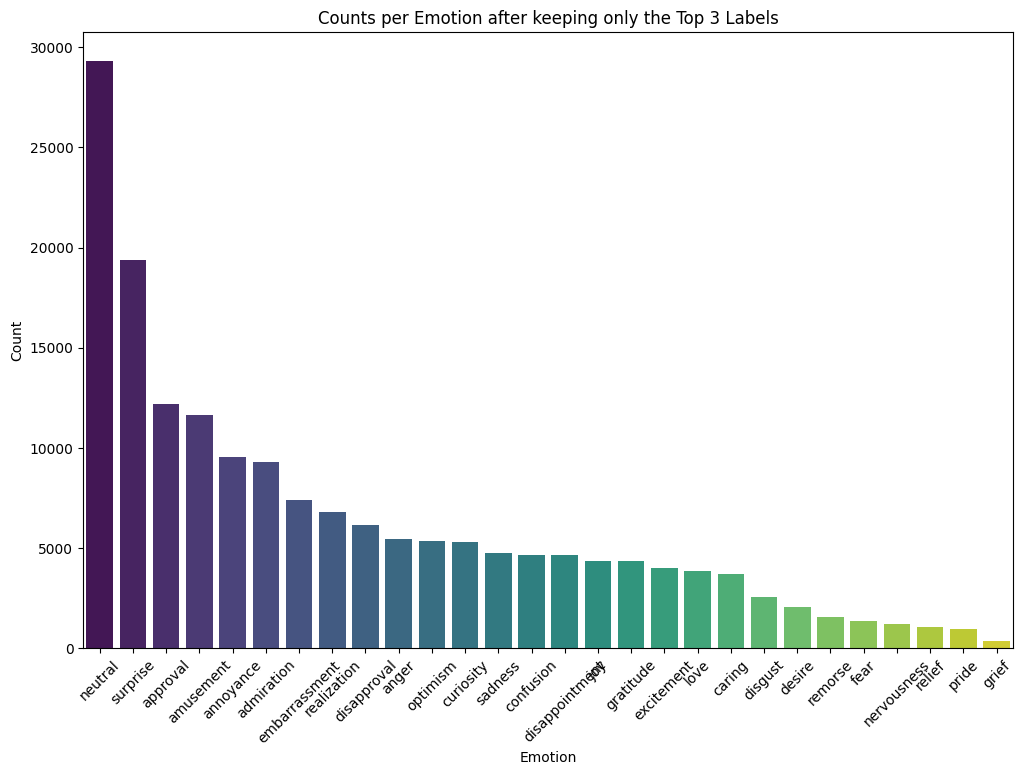

In [54]:
# Plot the distribution of emotion labels after keeping only the top 3 labels
top_3_emotion_counts = df_grouped[emotions].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_3_emotion_counts.index, y=top_3_emotion_counts.values, palette="viridis")
plt.title('Counts per Emotion after keeping only the Top 3 Labels')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Stratified Training and Test Sets

/tmp/ipykernel_425893/730295952.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_emotion_counts.index, y=train_emotion_counts.values, palette="viridis")


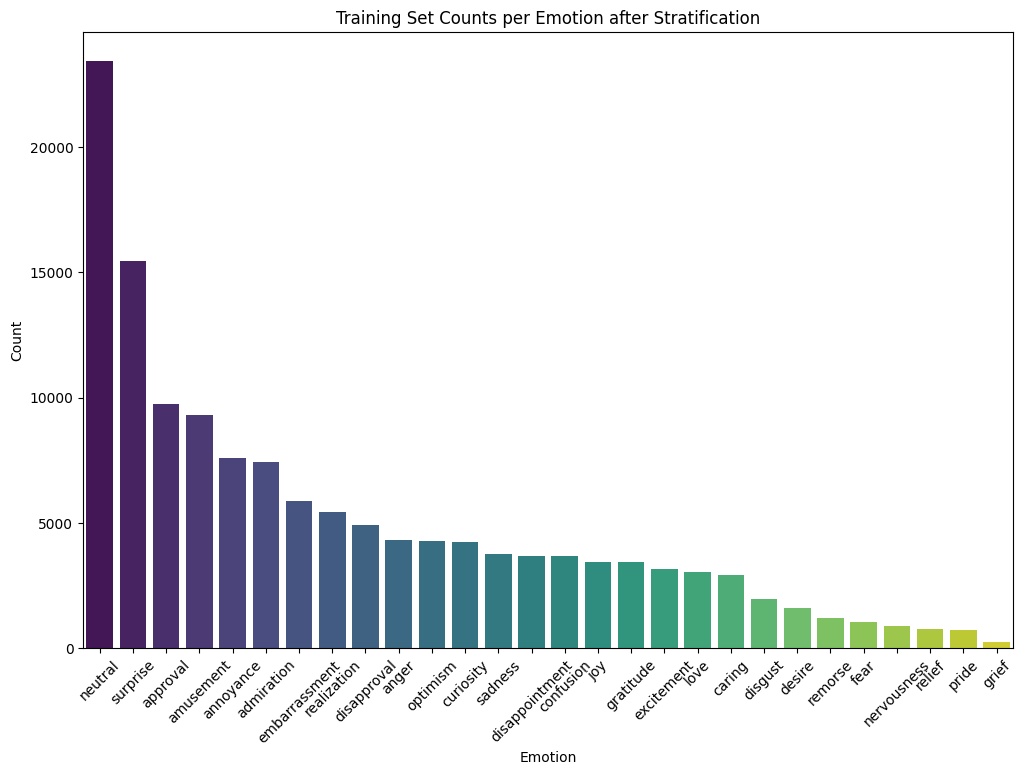

In [55]:
# Plot the distribution of emotion labels in the training set
train_emotion_counts = train[emotions].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=train_emotion_counts.index, y=train_emotion_counts.values, palette="viridis")
plt.title('Training Set Counts per Emotion after Stratification')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Test Set


/tmp/ipykernel_425893/2947565662.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_emotion_counts.index, y=test_emotion_counts.values, palette="viridis")


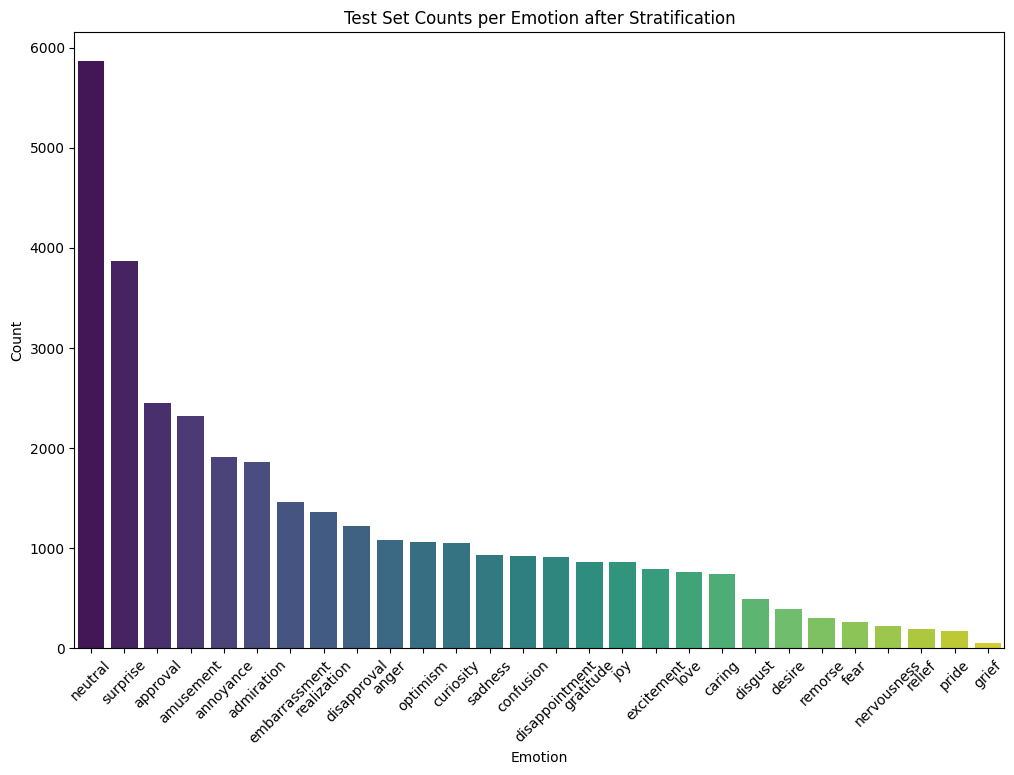

In [56]:
# Plot the distribution of emotion labels in the test set
test_emotion_counts = test[emotions].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=test_emotion_counts.index, y=test_emotion_counts.values, palette="viridis")
plt.title('Test Set Counts per Emotion after Stratification')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [57]:
# Calculate emotion counts for the training set
train_emotion_counts = train[emotions].sum()

# Calculate emotion counts for the test set
test_emotion_counts = test[emotions].sum()

# Combine the counts into a DataFrame
emotion_counts_df = pd.DataFrame({
    'Train': train_emotion_counts,
    'Test': test_emotion_counts
})

# Display the combined DataFrame
print("Emotion Counts in Train and Test Sets:")
print(emotion_counts_df)


Emotion Counts in Train and Test Sets:
                Train  Test
admiration       7414  1860
amusement        9285  2321
anger            4328  1084
annoyance        7587  1906
approval         9728  2447
caring           2936   736
confusion        3668   920
curiosity        4219  1050
desire           1614   393
disappointment   3678   915
disapproval      4898  1225
disgust          1963   491
embarrassment    5856  1460
excitement       3151   793
fear             1044   260
gratitude        3438   861
grief             236    56
joy              3438   858
love             3025   757
nervousness       884   219
optimism         4257  1065
pride             707   171
realization      5421  1357
relief            773   190
remorse          1212   297
sadness          3762   931
surprise        15449  3863
neutral         23414  5861


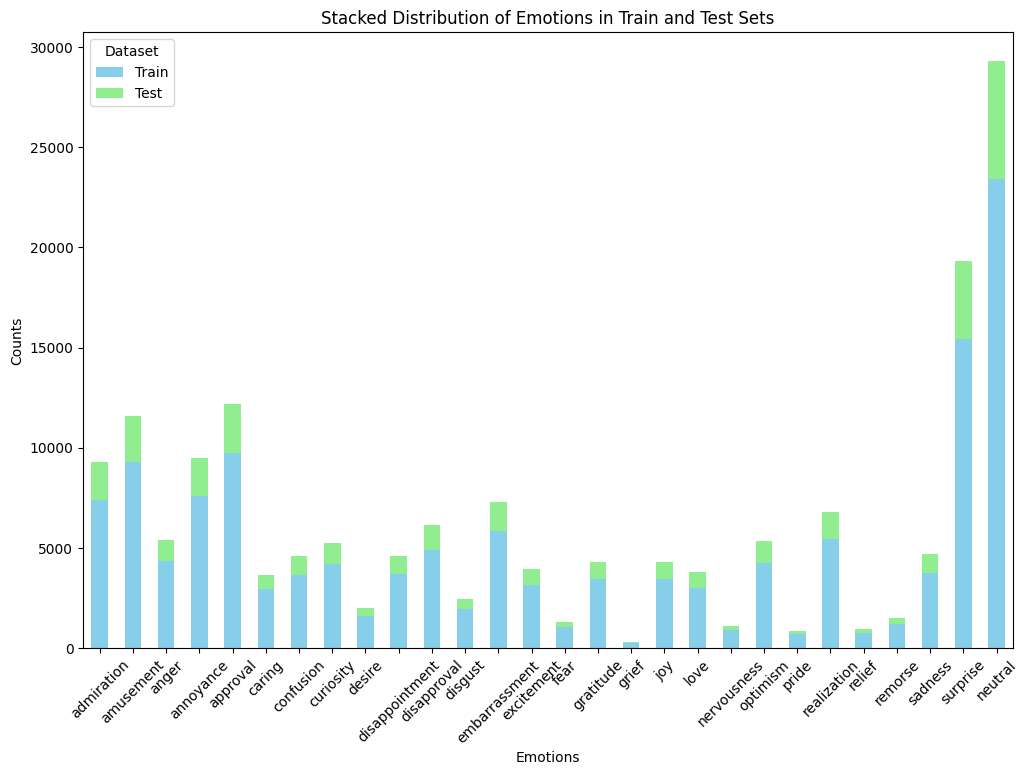

In [58]:
import matplotlib.pyplot as plt

# Plot the stacked bar chart
emotion_counts_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'lightgreen'])

# Add titles and labels
plt.title('Stacked Distribution of Emotions in Train and Test Sets')
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.show()


## Step 6: Stacked Distribution of Emotions in Train and Test Sets
Finally, let's visualize the distribution of emotions in the training and test sets using a stacked bar chart.

In [60]:
# Calculate emotion counts for the training set
train_emotion_counts = train[emotions].sum()

# Calculate emotion counts for the test set
test_emotion_counts = test[emotions].sum()

# Combine the counts into a DataFrame
emotion_counts_df = pd.DataFrame({
    'Train': train_emotion_counts,
    'Test': test_emotion_counts
})

# Calculate total counts for sorting
emotion_counts_df['Total'] = emotion_counts_df['Train'] + emotion_counts_df['Test']

# Sort the DataFrame by total counts
emotion_counts_df = emotion_counts_df.sort_values(by='Total', ascending=False)

# Drop the total column for plotting
emotion_counts_df = emotion_counts_df.drop(columns=['Total'])

# Display the sorted combined DataFrame
print("Sorted Emotion Counts in Train and Test Sets:")
print(emotion_counts_df)



Sorted Emotion Counts in Train and Test Sets:
                Train  Test
neutral         23414  5861
surprise        15449  3863
approval         9728  2447
amusement        9285  2321
annoyance        7587  1906
admiration       7414  1860
embarrassment    5856  1460
realization      5421  1357
disapproval      4898  1225
anger            4328  1084
optimism         4257  1065
curiosity        4219  1050
sadness          3762   931
disappointment   3678   915
confusion        3668   920
gratitude        3438   861
joy              3438   858
excitement       3151   793
love             3025   757
caring           2936   736
disgust          1963   491
desire           1614   393
remorse          1212   297
fear             1044   260
nervousness       884   219
relief            773   190
pride             707   171
grief             236    56


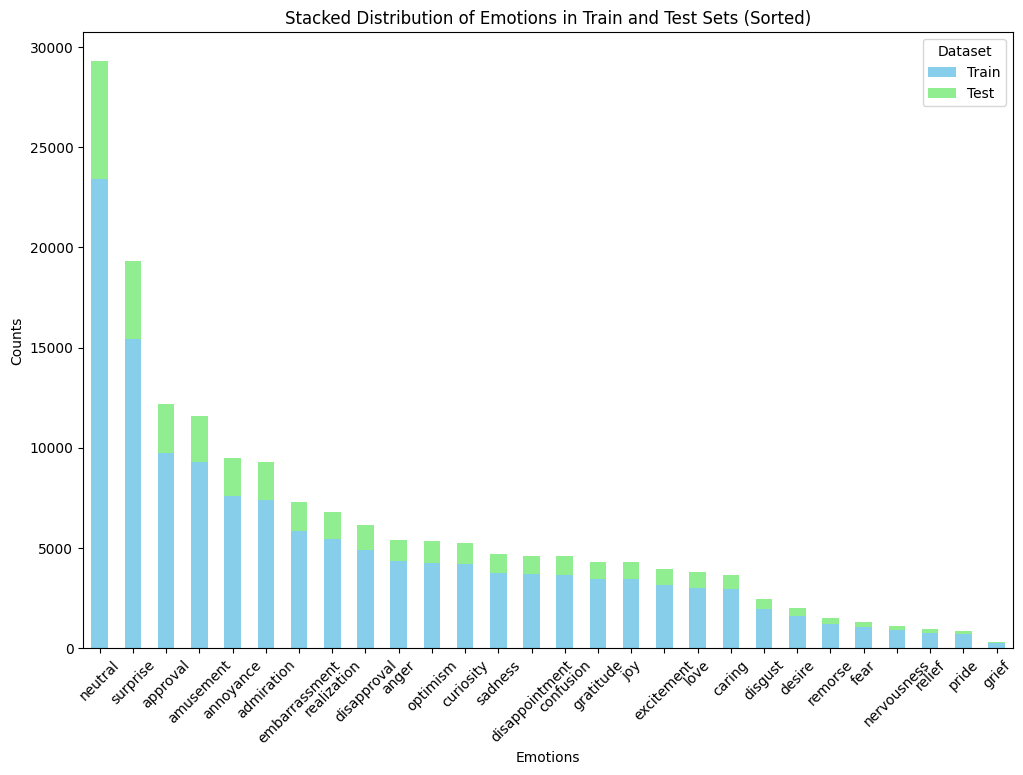

In [61]:
import matplotlib.pyplot as plt

# Plot the stacked bar chart
emotion_counts_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'lightgreen'])

# Add titles and labels
plt.title('Stacked Distribution of Emotions in Train and Test Sets (Sorted)')
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.show()


## Save the datasets to Parquet file

In [64]:
train.to_parquet("go_emotions_train.parquet")
test.to_parquet("go_emotions_test.parquet")